# ABU 量化系统  简介（版本 0.1）

* #### __author__ = 'BBFamily'
* ####  __email__ = 'bbfamily@126.com'
* ####  __weixin__ = 'aaaabbbuu'

## 第四部分 理论基础
        
            
            类似物理有基础理论试验物理，基于基础物理上的应用物理
            量化系统中构成因子等信号触发器的基础理论技术分析叫做
            基础技术

In [2]:
import ZEnv
import ZLog
import ZCommonUtil
%matplotlib inline

In [3]:
import SymbolPd
kl_pd = SymbolPd.make_kfold_pd('usNOAH')

***vwap n日成交量于n日成交均价除总量，计算出n日均线，以std作为波动信号（类似boll）vwap_mean = (kl_pd.volume * uq_close).sum() / kl_pd.volume.sum()**

In [8]:
import TLineVwap

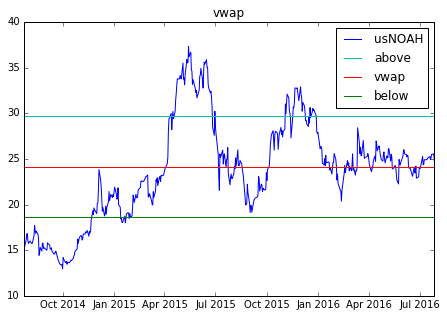

vwap(below=18.653499238200503, vwap=24.158091511147536, above=29.66268378409457)

In [9]:
TLineVwap.calc_vwap(kl_pd)

**跳空**

       跳空阀值不是取的固定值根据每个月的波动率以时间加权计算跳空阀值
       详情看calc_jump具体实现
       计算每个缺口的强度，记录当前调空阀值, 方向等信息
       jump	jump_diff	jump_power	jump_threshold	

In [25]:
import TLineJump
reload(TLineJump)

<module 'TLineJump' from '/Users/Bailey/Desktop/my_work/stock_fact/TLine/TLineJump.py'>

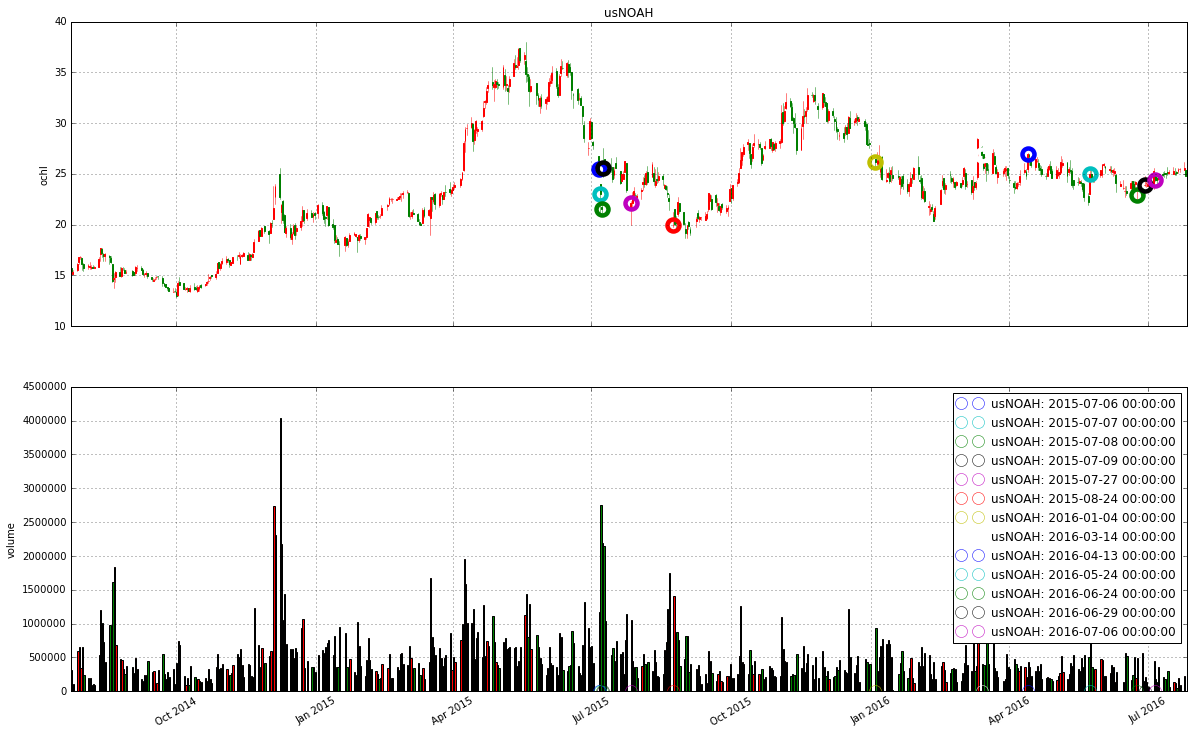

In [26]:
jumps = TLineJump.calc_jump(kl_pd, True)

In [22]:
jumps.filter(['jump', 'jump_diff', 'jump_power', 'jump_threshold', 'netChangeRatio'])

,jump,jump_diff,jump_power,jump_threshold,netChangeRatio
2015-07-06,-1.0,0.917585,1.187900,3.300667,-8.27
2015-07-07,-1.0,0.841670,1.770290,3.300667,-9.88
2015-07-08,-1.0,0.758493,1.001987,3.300667,-6.14
2015-07-09,1.0,0.711954,4.396353,3.300667,18.45
2015-07-27,-1.0,0.731796,1.434826,3.127333,-5.30
2015-08-24,-1.0,0.828710,1.315297,3.717857,-10.45
2016-01-04,-1.0,0.745172,1.919019,2.668000,-6.41
2016-03-14,-1.0,0.590735,1.134181,2.077857,-5.59
2016-04-13,1.0,0.415305,1.035384,1.678000,8.97
2016-05-24,1.0,0.324140,2.221263,1.456154,12.08


#### 应用举例，fiter出合适做为信号触发器的跳空点

**跳口power > 2.0的组成namedtuple jump array
        接口不考虑跳空时间权重**

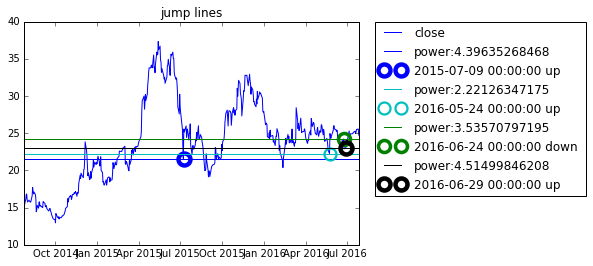

[jump(date=Timestamp('2015-07-09 00:00:00'), direction=1.0, power=4.3963526846826282, price=21.57),
 jump(date=Timestamp('2016-05-24 00:00:00'), direction=1.0, power=2.2212634717493693, price=22.260000000000002),
 jump(date=Timestamp('2016-06-24 00:00:00'), direction=-1.0, power=3.535707971950051, price=24.219999999999999),
 jump(date=Timestamp('2016-06-29 00:00:00'), direction=1.0, power=4.514998462078653, price=22.989999999999998)]

In [27]:
TLineJump.calc_jump_line(kl_pd)

**组成namedtuple jump array
        接口考虑跳空时间权重:使用线性时间权重分配sw[1]给予的权重**        

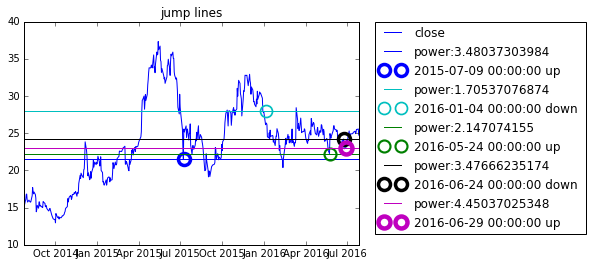

[jump(date=Timestamp('2015-07-09 00:00:00'), direction=1.0, power=3.4803730398421919, price=21.57),
 jump(date=Timestamp('2016-01-04 00:00:00'), direction=-1.0, power=1.7053707687351682, price=27.93),
 jump(date=Timestamp('2016-05-24 00:00:00'), direction=1.0, power=2.1470741549990922, price=22.260000000000002),
 jump(date=Timestamp('2016-06-24 00:00:00'), direction=-1.0, power=3.4766623517425348, price=24.219999999999999),
 jump(date=Timestamp('2016-06-29 00:00:00'), direction=1.0, power=4.4503702534763345, price=22.989999999999998)]

In [28]:
TLineJump.calc_jump_line_weight(kl_pd, sw=(0.6, 0.4))

跳空应用2 

在某个因子中首先做全量股票n年数据回归，记录diff_days 上次跳空距离买入的时间，跳空强度jump_power
做成大量有结果的数据，之后使用适当的机器学习技术分析拟合数据，学习成果融于因子中

**更多请参看 机器学习部分**

In [30]:
last_test_pd = ZCommonUtil.load_hdf5('./data/cache/golden_n6_ma5cross_use_last_test', 'golden_n6_ma5cross_use_last_test')

In [31]:
last_test_pd

,buy Date,buy Price,buy Cnt,buyFactor,Sell Date,Sell Price,Sell Type,Symbol,MaxLoss,ExtraInfo,...,atr_std,deg_hisWindowPd,deg_windowPd,deg_60WindowPd,jump_power,diff_days,wave_score1,wave_score2,wave_score3,symbol_index
2016-02-08,20160208,10.6550,18770,BuyGoldenFactorClass:42,None,NaN,keep,usIRC,9.88,"{'wave_score3': 0.28340811730873633, 'wave_sco...",...,0.333113,-5.230112,2.191405,10.656927,1.370972,165,0.043812,0.376757,0.283408,2
2016-02-10,20160210,13.4750,5106,BuyGoldenFactorClass:42,None,NaN,keep,usMW,7.55,"{'wave_score3': 0.78389574550219021, 'wave_sco...",...,0.264866,-41.806700,-8.563149,-24.950338,5.694825,61,0.683403,0.828747,0.783896,2
2016-05-02,20160502,26.6685,7499,BuyGoldenFactorClass:42,None,NaN,keep,usEMQ,25.95,"{'wave_score3': 1.0399936160389225, 'wave_scor...",...,0.471994,3.498252,0.437935,-1.030072,1.690447,53,1.083426,1.083427,1.039994,2
2016-05-18,20160518,11.2950,15326,BuyGoldenFactorClass:42,None,NaN,keep,usCRY,9.79,"{'wave_score3': 0.69677435791664288, 'wave_sco...",...,0.549794,1.734986,8.184068,8.706646,1.025996,204,0.570023,0.696156,0.696774,2
2016-06-09,20160609,10.2250,11506,BuyGoldenFactorClass:42,None,NaN,keep,usTWIN,6.76,"{'wave_score3': 1.0412408157722683, 'wave_scor...",...,0.394310,-23.831693,-14.688234,-5.195361,2.674804,127,0.896505,0.971589,1.041241,2
2016-06-20,20160620,20.9800,9532,BuyGoldenFactorClass:42,None,NaN,keep,usKKD,18.61,"{'wave_score3': 1.0729913831353624, 'wave_scor...",...,1.107224,1.444377,13.888673,20.783881,2.374813,86,0.826703,1.099127,1.072991,2
2016-07-05,20160705,2.3300,26654,BuyGoldenFactorClass:42,None,NaN,keep,usBDSI,-0.44,"{'wave_score3': 0.44674338324999907, 'wave_sco...",...,0.602049,-37.837626,2.314139,-23.247434,0.000000,0,0.449468,0.479669,0.446743,2
2016-07-06,20160706,37.0800,4407,BuyGoldenFactorClass:42,None,NaN,keep,usKSS,30.62,"{'wave_score3': 0.1063914111725346, 'wave_scor...",...,0.414596,-17.614827,-2.887430,-12.265145,1.268046,11,0.302943,0.197351,0.106391,2
2016-07-12,20160712,9.2400,9909,BuyGoldenFactorClass:42,None,NaN,keep,usSKY,8.53,"{'wave_score3': -0.31063416744518935, 'wave_sc...",...,-0.089414,39.237607,-4.479714,-2.397636,0.000000,0,0.218460,0.136617,-0.310634,2
2016-07-13,20160713,36.3750,5498,BuyGoldenFactorClass:42,None,NaN,keep,usHRL,33.96,"{'wave_score3': 0.68801030887129078, 'wave_sco...",...,0.754465,13.085974,-2.040554,-6.241558,1.555203,98,0.520571,0.733697,0.688010,2


**趋势**

        拟合趋势线寻找支撑阻力

In [34]:
import TLineTrend

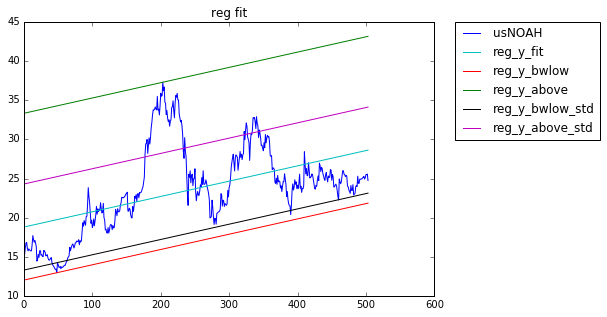

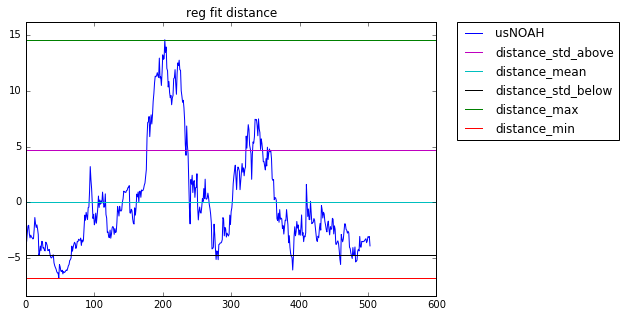

reg_fit(now=-3.8868615432971794, mean=3.157967714489334e-15, above=4.7051428025675852, below=-4.7051428025675781, distance_max=14.552347530407687, distance_min=-6.7852277815114697)

In [35]:
TLineTrend.calc_reg_fit(kl_pd)

**atr**

In [38]:
import TLineAtr
import TLineUtil

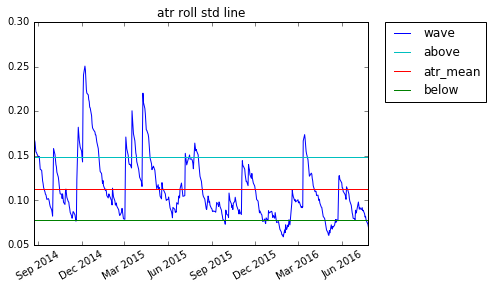

art score = -0.109856700631


atr_roll_std(atr_mean=0.11334196683255461, above=0.14850406592684917, below=0.07817986773826005, now=0.070454283350754349)

In [39]:
atr_t = TLineAtr.calc_atr_std(kl_pd)
score = TLineUtil.calc_score(atr_t)
ZLog.info('art score = {}'.format(score))
atr_t

#### atr_t score使用TLineUtil计算出的代表一种标准化状态，对atr来说也就是周期内波动程度状态的量化

参数：
1. 加权周期
2. 加权方式（默认指数加权）

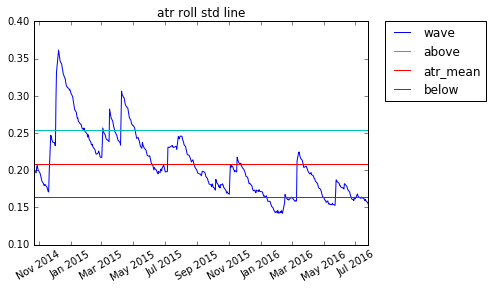

art score = -0.109446075174


atr_roll_std(atr_mean=0.20851545560667786, above=0.2537072958356352, below=0.1633236153777205, now=0.15343147629185575)

In [41]:
atr_t = TLineAtr.calc_atr_std(kl_pd, xd=3*21)
score = TLineUtil.calc_score(atr_t)
ZLog.info('art score = {}'.format(score))
atr_t

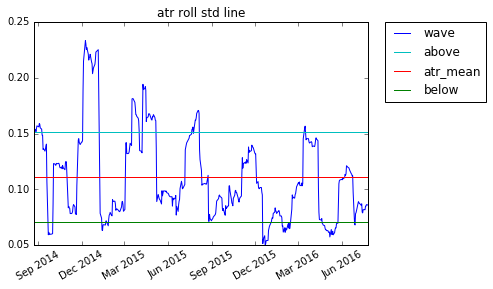

art score = 0.183535756333


atr_roll_std(atr_mean=0.11114064745762825, above=0.15113888986835614, below=0.07114240504690036, now=0.085824620392554618)

In [43]:
# ewm=False 使用线性加权
atr_t = TLineAtr.calc_atr_std(kl_pd, ewm=False)
score = TLineUtil.calc_score(atr_t)
ZLog.info('art score = {}'.format(score))
atr_t

**volume**

        对量的量化由于数据源的问题，导致数据不可信，类似obv，vwap等都不可以实际使用，
        重点需要解决的问题

In [47]:
import TLineVolume

min: 1661
mean: 481841.071429


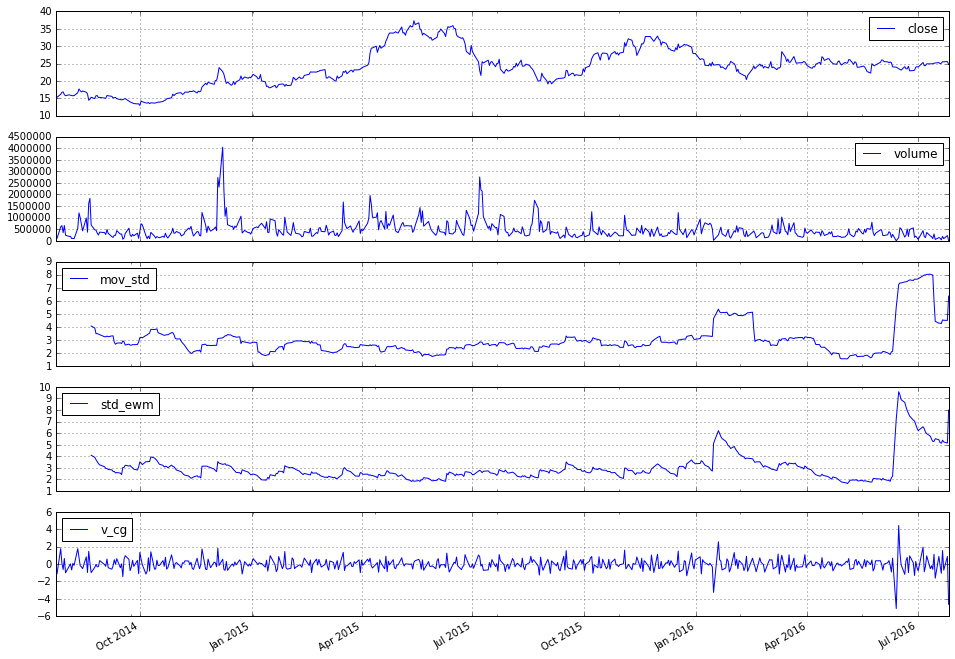

In [49]:
TLineVolume.show_volume_cg(kl_pd, data_proxy=False)

**波动程度**

In [51]:
import TLineWave

**        abs 不考虑正负，只考虑波动
        与股票的涨跌没有关系，只是自定义一个指标
        量化指定周期内波动程度, 不考虑之前的波动
        的时间效应，🐔不考虑波动的时间轴上的传播**

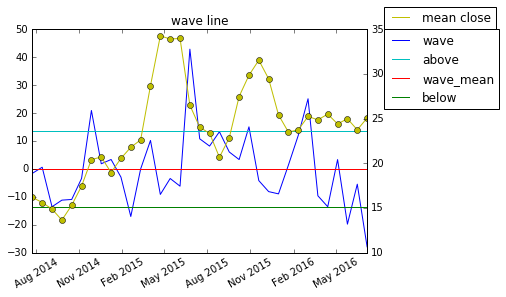

wave(wave_mean=-2.0301221021717148e-16, above=13.65844868585747, below=-13.65844868585747, now=-27.970285714285716)

In [59]:
TLineWave.calc_wave_abs(kl_pd)

**abs 不考虑正负，只考虑波动
        考虑波动的传播, 按照时间指数移动加权，波动的影响**

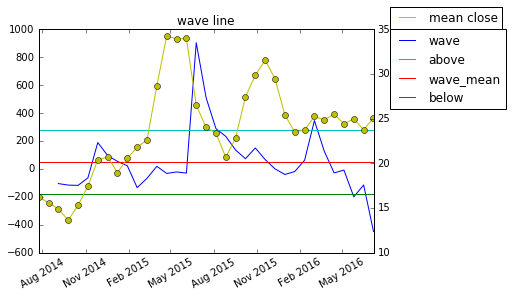

wave(wave_mean=51.724993410214715, above=281.5533354798916, below=-178.10334865946217, now=-449.05885687225992)

In [60]:
TLineWave.calc_wave_weight_abs(kl_pd)

考虑正负，只是按照rolling std计算

    kl_pd['return'] = np.log(kl_pd['close'] / kl_pd['close'].shift(1))
    if ewm:
        kl_pd['roll_std'] = kl_pd['return'].ewm(span=xd, min_periods=xd, adjust=True).std() * np.sqrt(xd)
    else:
        kl_pd['roll_std'] = kl_pd['return'].rolling(window=xd, center=False).std() * np.sqrt(xd)

    wave_mean = kl_pd['roll_std'].mean()
    std = kl_pd['roll_std'].std()
    above = wave_mean + std
    below = wave_mean - std

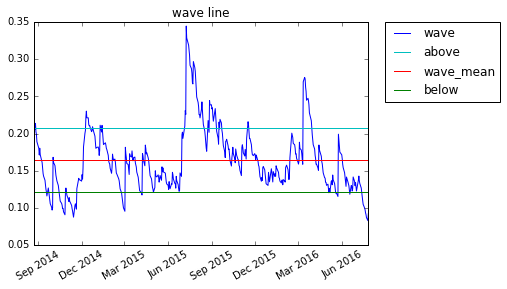

wave(wave_mean=0.1640141385837507, above=0.2072127223998287, below=0.12081555476767267, now=0.09241816110003423)

In [62]:
TLineWave.calc_wave_std(kl_pd)

**黄金分割**

        综合两种黄金切割方式，根据应用使用
        maximum，minimum进行选择


In [64]:
import TLineGolden

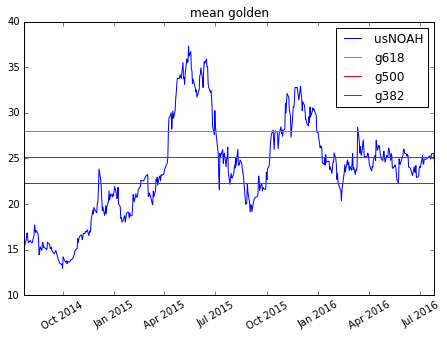

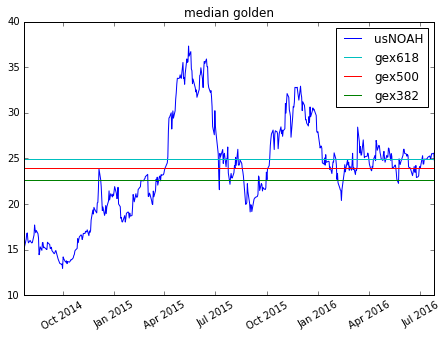

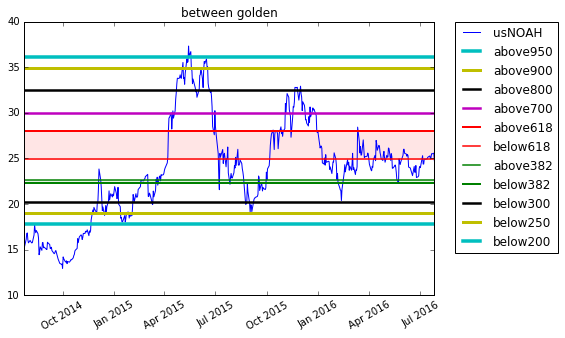

golden(g382=22.259340000000002, gex382=22.664380000000001, g500=25.134999999999998, gex500=23.939999999999998, g618=28.010660000000001, gex618=24.948540000000001, above618=28.010660000000001, below618=24.948540000000001, above382=22.664380000000001, below382=22.259340000000002, above950=36.101500000000001, above900=34.882999999999996, above800=32.445999999999998, above700=30.009, below300=20.260999999999999, below250=19.0425, below200=17.823999999999998)

In [65]:
TLineGolden.calc_golden(kl_pd)

**相关协整**

In [4]:
import TLineSimilar

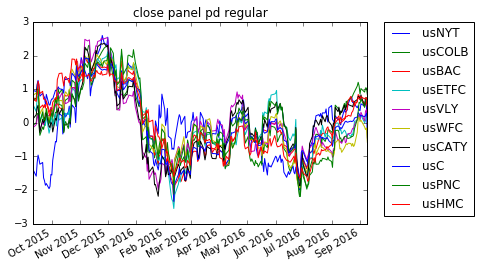

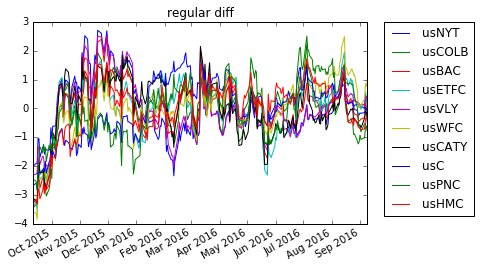

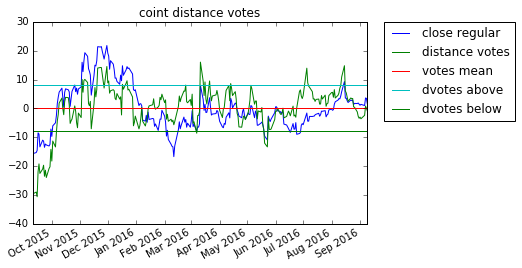

In [5]:
TLineSimilar.coint_similar('usNOAH')